In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
data_uri="http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
data_headers=["preg","conc","bp","thick","insulin","bmi","pedigree","age","class"]
data_frame=pd.read_csv(data_uri,names=data_headers)

In [11]:
data_frame.shape

(768, 9)

In [12]:
data_frame.head(5)

,preg,conc,bp,thick,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data_frame.tail(5)

,preg,conc,bp,thick,insulin,bmi,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
data_frame.isnull().values.any()

False

In [15]:
def plot_corr(data_frame,size=11):
    corr=data_frame.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

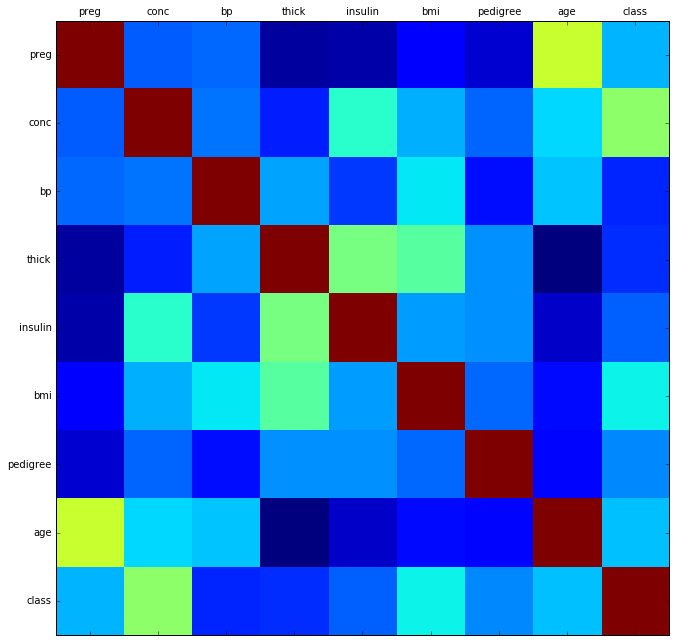

In [16]:
plot_corr(data_frame)

In [17]:
data_frame.corr()

,preg,conc,bp,thick,insulin,bmi,pedigree,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
num_obs=len(data_frame)
num_true=len(data_frame.loc[data_frame["class"]==1])
num_false=len(data_frame.loc[data_frame["class"]==0])
print("num_true: {} ({:.2f}%)".format(num_true,num_true/num_obs*100))
print("num_false: {} ({:.2f}%)".format(num_false,num_false/num_obs*100))


num_true: 268 (34.90%)
num_false: 500 (65.10%)


In [23]:
from sklearn.cross_validation import train_test_split

feature_names=["preg","conc","bp","thick","insulin","bmi","pedigree","age"]
target_name=["class"]

X=data_frame[feature_names].values
y=data_frame[target_name].values

split_test_size=0.30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split_test_size,random_state=42)
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)*100)))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)*100)))


69.92% in training set
30.08% in test set


In [27]:
# zero values
num_obs=len(data_frame.index)
print("num_obs: {}".format(num_obs))

z_preg=len(data_frame.loc[data_frame["preg"]==0])
z_pc_preg=z_preg/num_obs*100
print("z_preg:{}, z_pc_preg {:.2f}%".format(z_preg,z_pc_preg))

z_conc=len(data_frame.loc[data_frame["conc"]==0])
z_pc_conc=z_conc/num_obs*100
print("z_conc:{}, z_pc_conc {:.2f}%".format(z_conc,z_pc_conc))

z_bp=len(data_frame.loc[data_frame["bp"]==0])
z_pc_bp=z_bp/num_obs*100
print("z_bp:{}, z_pc_bp {:.2f}%".format(z_bp,z_pc_bp))

z_thick=len(data_frame.loc[data_frame["thick"]==0])
z_pc_thick=z_thick/num_obs*100
print("z_thick:{}, z_pc_thick {:.2f}%".format(z_thick,z_pc_thick))

z_insulin=len(data_frame.loc[data_frame["insulin"]==0])
z_pc_insulin=z_insulin/num_obs*100
print("z_insulin:{}, z_pc_insulin {:.2f}%".format(z_insulin,z_pc_insulin))

z_bmi=len(data_frame.loc[data_frame["bmi"]==0])
z_pc_bmi=z_bmi/num_obs*100
print("z_bmi:{}, z_pc_bmi {:.2f}%".format(z_bmi,z_pc_bmi))

z_pedigree=len(data_frame.loc[data_frame["pedigree"]==0])
z_pc_pedigree=z_pedigree/num_obs*100
print("z_pedigree:{}, z_pc_pedigree {:.2f}%".format(z_pedigree,z_pc_pedigree))

z_age=len(data_frame.loc[data_frame["age"]==0])
z_pc_age=z_age/num_obs*100
print("z_age:{}, z_pc_age {:.2f}%".format(z_age,z_pc_age))


num_obs: 768
z_preg:111, z_pc_preg 14.45%
z_conc:5, z_pc_conc 0.65%
z_bp:35, z_pc_bp 4.56%
z_thick:227, z_pc_thick 29.56%
z_insulin:374, z_pc_insulin 48.70%
z_bmi:11, z_pc_bmi 1.43%
z_pedigree:0, z_pc_pedigree 0.00%
z_age:0, z_pc_age 0.00%


In [28]:
from sklearn.preprocessing import Imputer
fill_0=Imputer(missing_values=0,strategy="mean",axis=0)
X_train=fill_0.fit_transform(X_train)
X_test=fill_0.fit_transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train.ravel())

GaussianNB()

In [33]:
nb_predict_train=nb_model.predict(X_train)
nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Training accuracy: {:.2f}%".format(metrics.accuracy_score(y_train,nb_predict_train)*100))
print("Testing accuracy: {:.2f}%".format(metrics.accuracy_score(y_test,nb_predict_test)*100))

Training accuracy: 75.42%
Testing accuracy: 73.59%


In [41]:
metrics.confusion_matrix(y_train,nb_predict_train,labels=[1,0])

array([[112,  76],
       [ 56, 293]])

In [42]:
metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0])

array([[ 52,  28],
       [ 33, 118]])

In [43]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)